In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("/Users/gdoc/Desktop/Kaggle Titanic/trainEdited.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
2,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
test = pd.read_csv("/Users/gdoc/Desktop/Kaggle Titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#AGE
#replace missing ages with averages
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(data.iloc[:,5:6])
data.iloc[:,5] = imputer.transform(data.iloc[:,5:6])
test.iloc[:,4] = imputer.transform(test.iloc[:,4:5])

In [5]:
#GENDER
#Encoding categorical data
Label_Encoder = LabelEncoder()
data.iloc[:,4] = Label_Encoder.fit_transform(data.iloc[:,4])
test.iloc[:,3] = Label_Encoder.fit_transform(test.iloc[:,3])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
2,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
3,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
4,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S


In [6]:
#Cabin to "Has Cabin"
data["Has Cabin"] = data.iloc[:,10].apply(lambda x: 0 if type(x) == float else 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0
2,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,0
3,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,1
4,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0


In [7]:
test["Has Cabin"] = test.iloc[:,9].apply(lambda x: 0 if type(x) == float else 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0


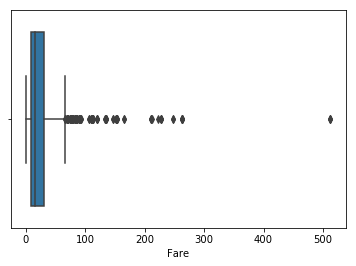

Median :  14.4542
Q3 :  31.0
Q1 :  7.9104
Low :  0
High :  65.6344
Size :  891


In [8]:
#FARE
#create boxplot
sns.boxplot(x = data.iloc[:,9])
plt.show()
plt.close()
median = np.median(data.iloc[:,9])
q3,q1 = np.percentile(data.iloc[:,9],[75,25])
iqr = q3 - q1
low = 0
high = q3 + 1.5*iqr
print("Median : ", median)
print("Q3 : ", q3)
print("Q1 : ", q1)
print("Low : ", low)
print("High : ", high)
print("Size : ", data.iloc[:,9].size)

In [9]:
#FARE
#section TicketPrice
data["TicketPrice"] = ""
for i in range(data.iloc[:,9].size):
    x = data.iloc[i,9].item()
    if x == "NaN":
        data.iloc[i,13] = "Not available"
    elif x <= q1:
        data.iloc[i,13] = "low"
    elif x <= median:
        data.iloc[i,13] = "mid"
    elif x <= high:
        data.iloc[i,13] = "upper"
    else:
        data.iloc[i,13] = "supperHigh"
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin,TicketPrice
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,low
1,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,mid
2,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,0,mid
3,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,1,upper
4,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,upper


In [10]:
test["TicketPrice"] = ""
for i in range(test.iloc[:,8].size):
    x = test.iloc[i,8].item()
    if x == "NaN":
        test.iloc[i,12] = "Not available"
    elif x <= q1:
        test.iloc[i,12] = "low"
    elif x <= median:
        test.iloc[i,12] = "mid"
    elif x <= high:
        test.iloc[i,12] = "upper"
    else:
        test.iloc[i,12] = "supperHigh"
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin,TicketPrice
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,low
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,mid
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,mid
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,mid


In [11]:
#NAME to PREFIX 
data["prefix"] = ""
for i in range(data.iloc[:,3].size):
    x = data.iloc[i,3]
    comma = x.find(',')
    period = x.find('.')
    prefix = x[comma+2:period+1]
    prefixes = ["Mr.", "Mrs.", "Miss.", "Master.", "Rev."]
    royal_prefixes = ["Lady.","Mlle.","Mme.","Sir.","the Countess."]
    if prefix in prefixes:
        data.iloc[i,14] = prefix
    elif prefix in royal_prefixes:
        data.iloc[i,14] = "Royal."
    else:
        if data.iloc[i,4] == 1:
            if data.iloc[i,5] > 12:
                data.iloc[i,14] = "Mr."
            else:
                data.iloc[i,14] = "Master."
        else:
            data.iloc[i,14] = "Miss."
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin,TicketPrice,prefix
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,low,Mr.
1,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,mid,Mr.
2,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,0,mid,Mr.
3,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,1,upper,Mr.
4,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,upper,Master.


In [12]:
#NAME to PREFIX for Test
test["prefix"] = ""
for i in range(test.iloc[:,2].size):
    x = test.iloc[i,2]
    comma = x.find(',')
    period = x.find('.')
    prefix = x[comma+2:period+1]
    prefixes = ["Mr.", "Mrs.", "Miss.", "Master.", "Rev."]
    royal_prefixes = ["Lady.","Mlle.","Mme.","Sir.","the Countess."]
    if prefix in prefixes:
        test.iloc[i,13] = prefix
    elif prefix in royal_prefixes:
        test.iloc[i,13] = "Royal."
    else:
        if test.iloc[i,3] == 1:
            if test.iloc[i,4] > 12:
                test.iloc[i,13] = "Mr."
            else:
                test.iloc[i,13] = "Master."
        else:
            test.iloc[i,13] = "Miss."
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin,TicketPrice,prefix
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,low,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,low,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,mid,Mr.
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,mid,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,mid,Mrs.


In [13]:
#EMBARKED
print(pd.crosstab(index = data["Embarked"], columns = "count"))
data = data.dropna(subset=["Embarked"])

col_0     count
Embarked       
C           168
Q            77
S           644


Survived    0    1
prefix            
Master.    17   23
Miss.      55  128
Mr.       445   85
Mrs.       26   98
Rev.        6    0
Royal.      0    6


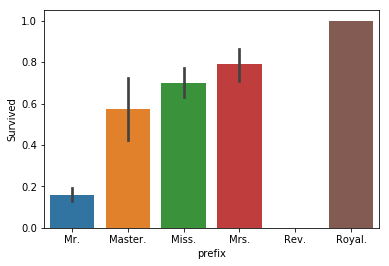

In [14]:
%matplotlib inline
ax = sns.barplot(x="prefix", y = "Survived",data=data)
print(pd.crosstab(index = data["prefix"], columns = data["Survived"]))

In [15]:
#ENCODE ALL DATA

prepData = data.iloc[:,[1,2,4,5,6,7,11,12,13,14]]
x = prepData.iloc[:,[6,8,9]]
#Get dummies, drop_first avoid multicollinearity
encodedCatDat = pd.get_dummies(x,drop_first=True)
prepData = prepData.iloc[:,[0,1,2,3,4,5,7]]
finalDat = pd.concat([prepData,encodedCatDat],axis = 1)
finalDat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Has Cabin,Embarked_Q,Embarked_S,TicketPrice_mid,TicketPrice_supperHigh,TicketPrice_upper,prefix_Miss.,prefix_Mr.,prefix_Mrs.,prefix_Rev.,prefix_Royal.
0,0,3,1,22.000000,1,0,0,0,1,0,0,0,0,1,0,0,0
1,0,3,1,35.000000,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,3,1,29.699118,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0,1,1,54.000000,0,0,1,0,1,0,0,1,0,1,0,0,0
4,0,3,1,2.000000,3,1,0,0,1,0,0,1,0,0,0,0,0


In [16]:
#ENCODE ALL DATA for TEST

prepTest = test.iloc[:,[1,3,4,5,6,10,11,12,13]]
x_t = prepTest.iloc[:,[5,7,8]]
#Get dummies, drop_first avoid multicollinearity
encodedCatTest = pd.get_dummies(x_t,drop_first=True)
prepTest = prepTest.iloc[:,[0,1,2,3,4,6]]
finalTest = pd.concat([prepTest,encodedCatTest],axis = 1)
finalTest["prefix_Royal."] = ""
for i in range(finalTest.iloc[:,0].size):
    finalTest.iloc[i,15] = 0
finalTest.head()

,Pclass,Sex,Age,SibSp,Parch,Has Cabin,Embarked_Q,Embarked_S,TicketPrice_mid,TicketPrice_supperHigh,TicketPrice_upper,prefix_Miss.,prefix_Mr.,prefix_Mrs.,prefix_Rev.,prefix_Royal.
0,3,1,34.5,0,0,0,1,0,0,0,0,0,1,0,0,0
1,3,0,47.0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,2,1,62.0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,3,1,27.0,0,0,0,0,1,1,0,0,0,1,0,0,0
4,3,0,22.0,1,1,0,0,1,1,0,0,0,0,1,0,0


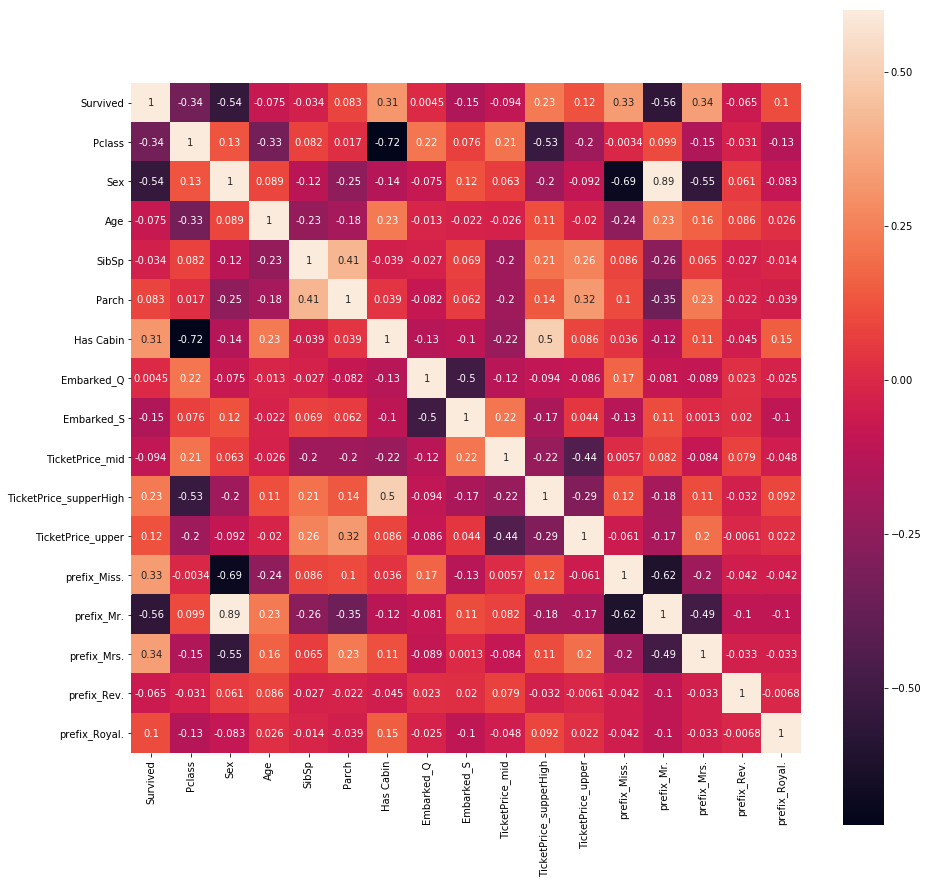

In [17]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(finalDat.corr(), vmax=0.6, square=True, annot=True, ax = ax)

In [18]:
#SEPARATE encoded data in input(X) and target(Y)
X = finalDat.iloc[:,1:].values
Y = finalDat.iloc[:,0].values
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify = Y)

**Logistic Regression**

In [19]:
lr = LogisticRegression(penalty = 'l1', C = 1.1)
lr.fit(x_train, y_train)
print("Test accuracy : ", lr.score(x_test, y_test))

Test accuracy :  0.865168539326


In [20]:
answers = lr.predict(finalTest.values)
print(answers)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [21]:
type(answers)
answers.shape

(418,)

In [22]:
numbers = pd.read_csv("/Users/gdoc/Desktop/Kaggle Titanic/titanic_submission.csv")
numbers.head()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived
0,0,0,0,0
1,1,1,0,0
2,2,2,0,0
3,3,3,0,0
4,4,4,1,1
